<a href="https://colab.research.google.com/github/BrianGisemba/Autolib/blob/main/Moringa_School_Brian_Michira_WK4_core_IP_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESEARCH QUESTION

To determine if there is a significant difference in the means of bluecares taken in two different postal codes.

###IMPORTING LIBRARIES

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

###LOADING AND PREVIEWING THE DATASET

In [2]:
#loadind dataset
autolib=pd.read_csv("/content/autolib_daily_events_postal_code.csv")


In [3]:
#previewing the top
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
#previewing the bottom
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [5]:
#data info
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


###CLEANING 


In [6]:
#dropping irrelevant columns
col=[ 'Utilib_taken_sum','Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']
autolib.drop(col,axis=1,inplace=True)

In [7]:
#viewing the dataset after dropping the column
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [8]:
# standardizing the columns 
autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

In [9]:
#Changing date column from object to datetime
autolib['date'] = pd.to_datetime(autolib['date'])

In [10]:
#Creating a new column week_day with day of week in words
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
autolib['week_day']  = autolib['dayofweek'].map(day)
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,week_day
0,75001,2018-01-01,1440,0,weekday,110,103,22,20,Mon
1,75001,2018-01-02,1438,1,weekday,98,94,23,22,Tue
2,75001,2018-01-03,1439,2,weekday,138,139,27,27,Wed
3,75001,2018-01-04,1320,3,weekday,104,104,25,21,Thur
4,75001,2018-01-05,1440,4,weekday,114,117,18,20,Fri


In [11]:
#checking for missing values
autolib.isnull().sum()

postal_code              0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
week_day                 0
dtype: int64

There are no missing values

In [12]:
#checking for duplicates
autolib.duplicated().sum()

0

There are no duplicates

In [13]:
#checking for outliers
# Calculating our first, third quantiles and then later our IQR
# ---
autolib_num=autolib[['bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']]
Q1 = autolib_num.quantile(0.25)
Q3 = autolib_num.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
autolib_out = autolib_num[~((autolib_num < (Q1 - 1.5 * IQR)) | (autolib_num > (Q3 + 1.5 * IQR))).any(axis=1)]
autolib_out

,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
22,112,113,11,9
29,103,103,11,11
36,118,118,12,11
49,85,86,12,12
50,100,98,11,11
...,...,...,...,...
16080,15,10,0,0
16081,19,19,0,0
16082,33,35,0,0
16083,11,14,0,0


Outliers are too many to remove and removing them will affect the data analysis since the data will be useful in arriving at our conclusion.

###UNIVARIATE ANALYSIS

In [14]:
#viewing descriptive statistics of our numerical variables
autolib.describe().T

,count,mean,std,min,25%,50%,75%,max
postal_code,16085.0,88791.293876,7647.342000,75001.0,91330.0,92340.0,93400.0,95880.0
n_daily_data_points,16085.0,1431.330619,33.212050,1174.0,1439.0,1440.0,1440.0,1440.0
dayofweek,16085.0,2.969599,2.008378,0.0,1.0,3.0,5.0,6.0
bluecars_taken_sum,16085.0,125.926951,185.426579,0.0,20.0,46.0,135.0,1352.0
bluecars_returned_sum,16085.0,125.912714,185.501535,0.0,20.0,46.0,135.0,1332.0
slots_freed_sum,16085.0,22.629033,52.120263,0.0,0.0,0.0,5.0,360.0
slots_taken_sum,16085.0,22.629282,52.146030,0.0,0.0,0.0,5.0,359.0


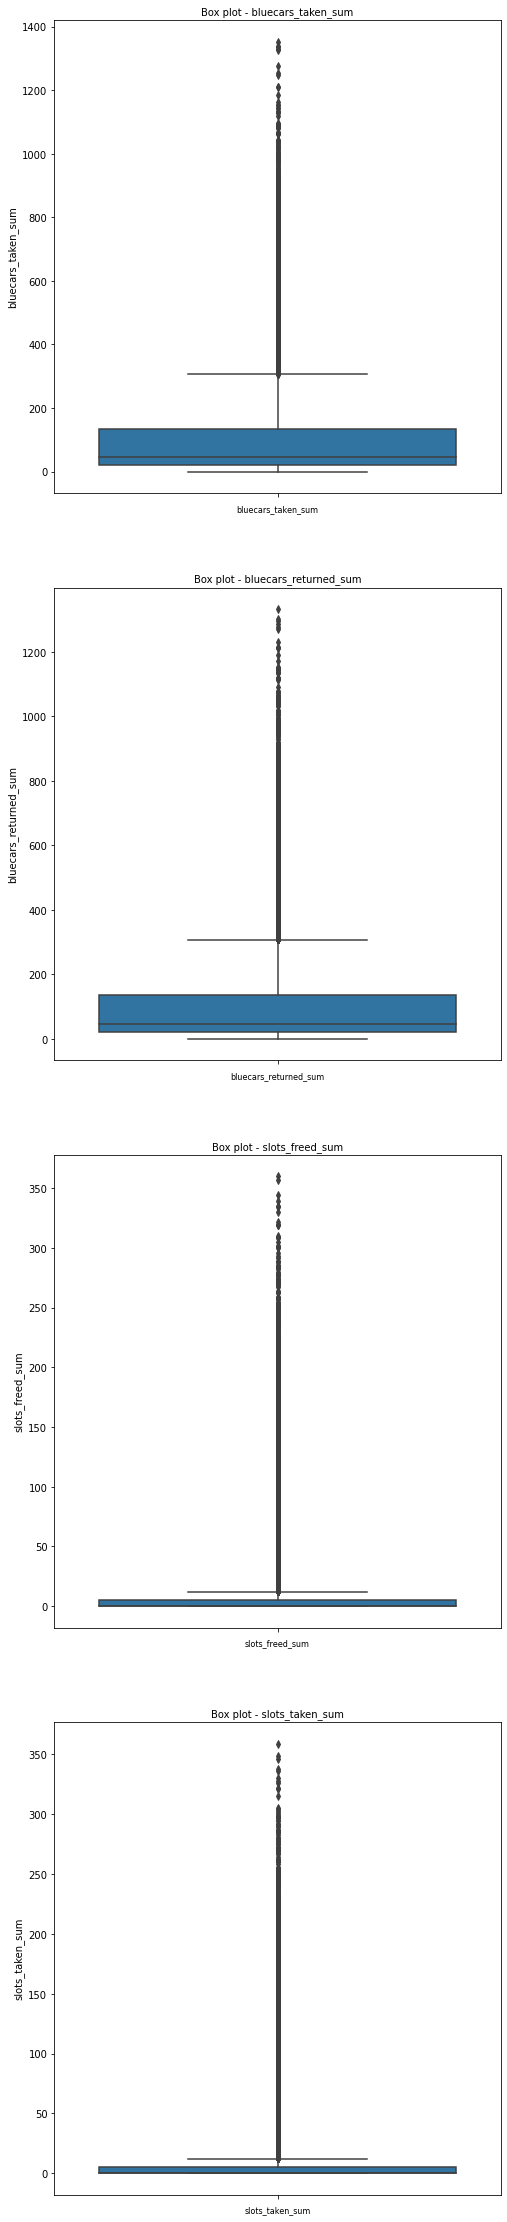

In [15]:
#checking for outliers
col_names = ['bluecars_taken_sum','bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = autolib[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

The outliers are too many

In [16]:
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum', 'week_day'],
      dtype='object')

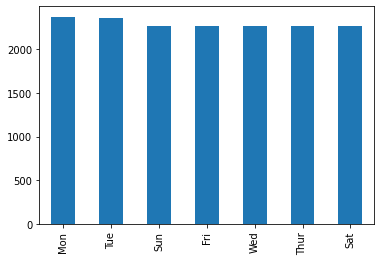

In [17]:
#showing daily disrtibution
autolib['week_day'].value_counts().plot.bar()

In [18]:
autolib['week_day'].value_counts().sort_values(ascending=False)

Mon     2374
Tue     2363
Sun     2274
Fri     2271
Thur    2268
Wed     2268
Sat     2267
Name: week_day, dtype: int64

Alot of data was collected on monday.

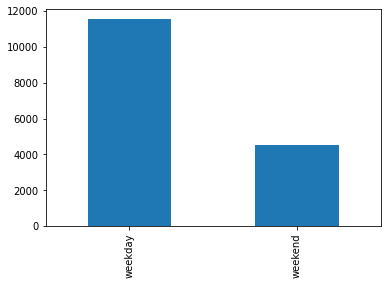

In [19]:
#comparing the data collected in weekdays and weekends
autolib['day_type'].value_counts().plot.bar()

In [20]:
autolib['day_type'].value_counts()


weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [21]:
#blue cars taken descriptive statistics
print('The mean of bluecars taken is:',autolib['bluecars_taken_sum'].mean())
print('The median of bluecars taken is:',autolib['bluecars_taken_sum'].median())
print('The mode of bluecars taken is:',autolib['bluecars_taken_sum'].mode())
print('The standard deviation of bluecars taken is:',autolib['bluecars_taken_sum'].std())
print('The skewness of bluecars taken is:',autolib['bluecars_taken_sum'].skew())
print('The kurtosis of bluecars taken is:',autolib['bluecars_taken_sum'].kurt())

The mean of bluecars taken is: 125.92695057506994
The median of bluecars taken is: 46.0
The mode of bluecars taken is: 0    12
dtype: int64
The standard deviation of bluecars taken is: 185.42657876727893
The skewness of bluecars taken is: 2.4063548974959086
The kurtosis of bluecars taken is: 6.172692305510042


Data for the Blue cras taken was right skewed showing most values appeared on the right side.The Kurtosis was leptokurtic indicating the presence of outliers.

In [22]:
#blue cars returned descriptive statistics
print('The mean of bluecars returned is:',autolib['bluecars_returned_sum'].mean())
print('The median of bluecars returned is:',autolib['bluecars_returned_sum'].median())
print('The mode of bluecars returned is:',autolib['bluecars_returned_sum'].mode())
print('The standard deviation of bluecars returned is:',autolib['bluecars_returned_sum'].std())
print('The skewness of bluecars returned is:',autolib['bluecars_returned_sum'].skew())
print('The kurtosis of bluecars returned is:',autolib['bluecars_returned_sum'].kurt())

The mean of bluecars returned is: 125.912713708424
The median of bluecars returned is: 46.0
The mode of bluecars returned is: 0    13
dtype: int64
The standard deviation of bluecars returned is: 185.50153480148427
The skewness of bluecars returned is: 2.412084978838923
The kurtosis of bluecars returned is: 6.1862880957582345


Data for the Blue cras returned is right skewed showing most values appear on the right side.The Kurtosis was leptokurtic indicating the presence of outliers.

In [23]:
print('The mean of slots freed is:',autolib['slots_freed_sum'].mean())
print('The median of slots freed is:',autolib['slots_freed_sum'].median())
print('The mode of slots freed is:',autolib['slots_freed_sum'].mode())
print('The standard deviation of slots freed is:',autolib['slots_freed_sum'].std())
print('The skewness of slots freed is:',autolib['slots_freed_sum'].skew())
print('The kurtosis of slots freed is:',autolib['slots_freed_sum'].kurt())

The mean of slots freed is: 22.62903326080199
The median of slots freed is: 0.0
The mode of slots freed is: 0    0
dtype: int64
The standard deviation of slots freed is: 52.12026333757879
The skewness of slots freed is: 2.5974057870090994
The kurtosis of slots freed is: 6.454514382612528


Data for the Slots freed is right skewed showing most values appear on the right side.The Kurtosis was leptokurtic indicating the presence of outliers.

In [24]:
print('The mean of slots taken is:',autolib['slots_taken_sum'].mean())
print('The median of slots taken is:',autolib['slots_taken_sum'].median())
print('The mode of slots taken is:',autolib['slots_taken_sum'].mode())
print('The standard deviation of slots taken is:',autolib['slots_taken_sum'].std())
print('The skewness of slots taken is:',autolib['slots_taken_sum'].skew())
print('The kurtosis of slots taken is:',autolib['slots_taken_sum'].kurt())

The mean of slots taken is: 22.629281939695367
The median of slots taken is: 0.0
The mode of slots taken is: 0    0
dtype: int64
The standard deviation of slots taken is: 52.146029870452566
The skewness of slots taken is: 2.5969043474634987
The kurtosis of slots taken is: 6.442553073772169


Data for the Slots taken was right skewed showing most values appear on the right side.The Kurtosis was leptokurtic indicating the presence of outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

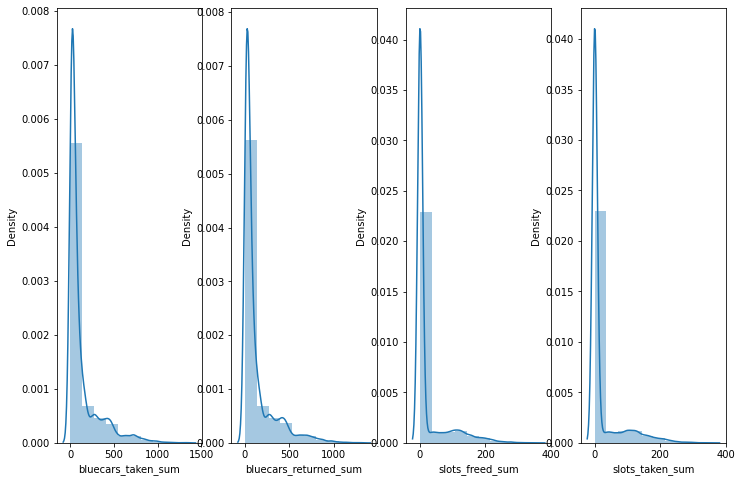

In [25]:
# graphical representation of the univariate analysis

bins = 10

fig, (ax1,ax2,ax3, ax4) = plt.subplots(1, 4, figsize= (12,8))

sns.distplot(autolib.bluecars_taken_sum, ax=ax1, bins= bins)
sns.distplot(autolib.bluecars_returned_sum, ax=ax2, bins= bins)
sns.distplot(autolib.slots_freed_sum, ax=ax3, bins= bins)
sns.distplot(autolib.slots_taken_sum, ax=ax4, bins= bins)
plt.show()

###BIVARIATE

In [26]:
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum', 'week_day'],
      dtype='object')

Continous variables

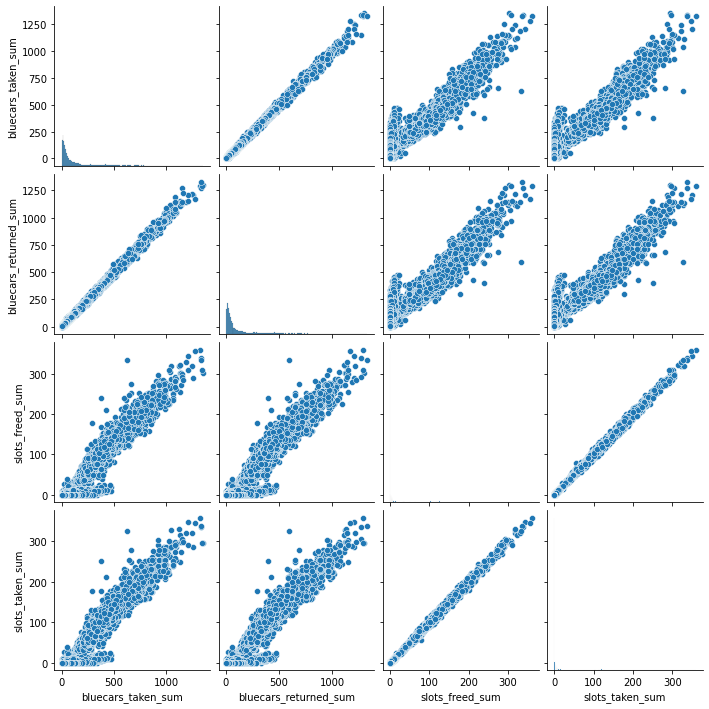

In [27]:
#summary of bivariate analysis 
sns.pairplot(autolib[['bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']])
plt.show()

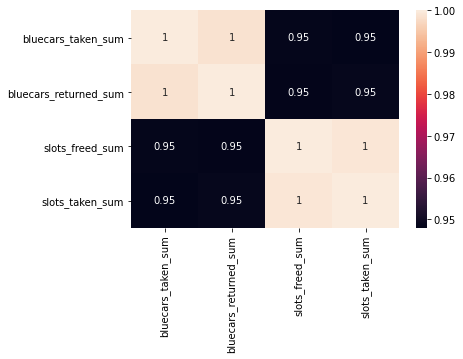

In [28]:
sns.heatmap(autolib[['bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']].corr(),annot=True)
plt.show()

There is a positive correlation between the variables.

###HYPOTHESIS TESTING

In [29]:
#selecting from the population blue cars taken on weekdays
autolib=autolib[autolib['day_type']=='weekday']
autolib

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,week_day
0,75001,2018-01-01,1440,0,weekday,110,103,22,20,Mon
1,75001,2018-01-02,1438,1,weekday,98,94,23,22,Tue
2,75001,2018-01-03,1439,2,weekday,138,139,27,27,Wed
3,75001,2018-01-04,1320,3,weekday,104,104,25,21,Thur
4,75001,2018-01-05,1440,4,weekday,114,117,18,20,Fri
...,...,...,...,...,...,...,...,...,...,...
16078,95880,2018-06-13,1440,2,weekday,12,13,0,0,Wed
16079,95880,2018-06-14,1439,3,weekday,15,13,0,0,Thur
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0,Fri
16083,95880,2018-06-18,1440,0,weekday,11,14,0,0,Mon


In [30]:
#conducting stratified sampling to get a sample with equal propotions to the population.
autolib_strat = autolib.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
print(autolib_strat['postal_code'].value_counts())
print(autolib_strat)

92150    11
94700    11
92400    11
94450    11
92410    11
         ..
92160    11
92340    10
93370    10
93200     9
93390     6
Name: postal_code, Length: 104, dtype: int64
       postal_code       date  ...  slots_taken_sum  week_day
31           75001 2018-02-01  ...               20      Thur
88           75001 2018-04-02  ...               19       Mon
89           75001 2018-04-03  ...               22       Tue
35           75001 2018-02-05  ...               18       Mon
4            75001 2018-01-05  ...               20       Fri
...            ...        ...  ...              ...       ...
16055        95880 2018-05-21  ...                0       Mon
15950        95880 2018-01-22  ...                0       Mon
16007        95880 2018-03-23  ...                0       Fri
15980        95880 2018-02-21  ...                0       Wed
15993        95880 2018-03-09  ...                0       Fri

[1135 rows x 10 columns]


In [31]:
#viewing the stratified sample
autolib_strat


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,week_day
31,75001,2018-02-01,1440,3,weekday,112,110,21,20,Thur
88,75001,2018-04-02,1439,0,weekday,156,151,20,19,Mon
89,75001,2018-04-03,1440,1,weekday,112,111,22,22,Tue
35,75001,2018-02-05,1440,0,weekday,121,121,17,18,Mon
4,75001,2018-01-05,1440,4,weekday,114,117,18,20,Fri
...,...,...,...,...,...,...,...,...,...,...
16055,95880,2018-05-21,1440,0,weekday,26,27,0,0,Mon
15950,95880,2018-01-22,1440,0,weekday,3,9,0,0,Mon
16007,95880,2018-03-23,1440,4,weekday,13,12,0,0,Fri
15980,95880,2018-02-21,1440,2,weekday,5,7,0,0,Wed


HYPOTHESES


H0 : There is no significant statistical difference in  the mean of blue cars taken in postal codes 75015 and 95880.

H1 : There is a significant statistical difference between the mean of blue cars taken in postal codes 75015 and 95880.


In [32]:
#Extracting data of postal code 75015 from the stratified sample
autolib1= autolib_strat[(autolib_strat['postal_code'] == 75015)]
autolib1

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,week_day
2335,75015,2018-06-15,1440,4,weekday,1093,1056,288,294,Fri
2214,75015,2018-01-31,1440,2,weekday,816,839,226,235,Wed
2233,75015,2018-02-19,1420,0,weekday,650,688,192,202,Mon
2208,75015,2018-01-25,1398,3,weekday,871,838,235,233,Thur
2219,75015,2018-02-05,1440,0,weekday,808,807,249,247,Mon
2280,75015,2018-04-10,1440,1,weekday,887,875,254,254,Tue
2241,75015,2018-03-02,1440,4,weekday,897,860,253,255,Fri
2187,75015,2018-01-04,1320,3,weekday,669,644,165,158,Thur
2247,75015,2018-03-08,1439,3,weekday,790,778,229,227,Thur
2185,75015,2018-01-02,1438,1,weekday,710,720,191,193,Tue


In [33]:
#Getting the shape to determine the sample size of the strata
autolib1.shape

(11, 10)

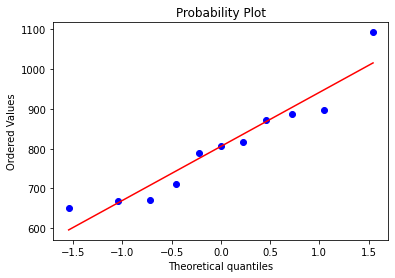

In [34]:
#ploting a probability plot to check for normality
from scipy import stats
stats.probplot(autolib1['bluecars_taken_sum'], plot= plt)
plt.show()

In [35]:
#shapiro test
#Running a statistical test to a certain if the variable is normally distributed
from scipy.stats import shapiro 
stat, p = shapiro(autolib1['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.917, p=0.292
Sample looks Gaussian


In [36]:
#Extracting data of postal code 75015 from the stratified sample
autolib2= autolib_strat[(autolib_strat['postal_code'] == 95880)]
autolib2

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,week_day
16004,95880,2018-03-20,1440,1,weekday,13,12,0,0,Tue
15961,95880,2018-02-02,1440,4,weekday,17,15,0,0,Fri
15931,95880,2018-01-03,1439,2,weekday,7,13,0,0,Wed
15954,95880,2018-01-26,1437,4,weekday,9,7,0,0,Fri
16057,95880,2018-05-23,1174,2,weekday,14,12,0,0,Wed
16078,95880,2018-06-13,1440,2,weekday,12,13,0,0,Wed
16055,95880,2018-05-21,1440,0,weekday,26,27,0,0,Mon
15950,95880,2018-01-22,1440,0,weekday,3,9,0,0,Mon
16007,95880,2018-03-23,1440,4,weekday,13,12,0,0,Fri
15980,95880,2018-02-21,1440,2,weekday,5,7,0,0,Wed


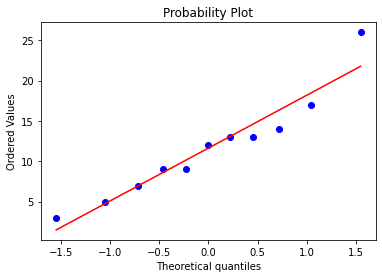

In [37]:
#Plotting a probability plot to check if the data is normally distributed
from scipy import stats
stats.probplot(autolib2['bluecars_taken_sum'], plot= plt)
plt.show()

In [38]:
#Running Shapiro wilk test to acertain that the data in the variable is normally distributed
stat, p = shapiro(autolib2['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.934, p=0.452
Sample looks Gaussian


In [39]:
#Getting the shape of the dataset to determine the sample size of the stratum
autolib2.shape

(11, 10)

Since the sample size of both stratas is less than 30 we decided to use T-test .

##T-test

In [40]:
# Computing the T-Statistics and the P value
# importing stats
from scipy.stats import ttest_ind


t_stat,p_value = ttest_ind(autolib1['bluecars_taken_sum'],autolib2['bluecars_taken_sum'])

print('The test Statistics is :',t_stat,'The P Value is: ',p_value)

The test Statistics is : 20.05436289088982 The P Value is:  1.0254393310294808e-14


In [41]:
#calculating the point estimate
point_estimate=autolib1['bluecars_taken_sum'].mean()-autolib2['bluecars_taken_sum'].mean()
point_estimate
print('The point estimate is :',point_estimate)

The point estimate is : 794.0909090909091


In [42]:
#calculating the confidence interval
from math import sqrt
from scipy.stats import t
N1 = 11
N2 = 11
df = (N1 + N2 - 2)
std1 = autolib1['bluecars_taken_sum'].std()
std2 = autolib1['bluecars_taken_sum'].std()
#pooled standard deviation
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 
#margin of error
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)
# confidence interval
confidence_interval=[point_estimate - MoE, point_estimate + MoE]
print('The Confidence Interval is :',confidence_interval)

The Confidence Interval is : [677.4151374188373, 910.766680762981]


##COCLUSION


In [43]:
#conclusion
if p_value >0.025:
  print('We fail to reject the Null Hypothesis')
else:
  print('We Reject the Null Hypothesis')

We Reject the Null Hypothesis


Since the P Value is less than the level of significance we reject the Null Hypothesis and conclude that there is a statistical significant difference between the means of Blue Cars taken in postal codes 75015 and 95880.